In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
from dl_utils.utils.dataset import viz_dataloader, split_train_valid, hdf5_dataset
from dl_utils.training.build_model import fpn_resnet50_classification
from dl_utils.training.trainer import Trainer, accuracy
from dl_utils.packed_functions import benchmark_task

ds_path_info = {'imagenet': '../../datasets/imagenet_v5_rot_10m_fix_vector.h5',
                'noise': '../../datasets/noise_v5_rot_1m_fix_vector.h5',
                'atom': '../../datasets/atom_v5_rot_1m_fix_vector.h5',
                'viz_dataloader': False}

training_specs = {'batch_size': 1800, 
                  'num_workers': 12, 
                  'device_ids': [4,5,6], 
                  'shuffle': True,
                  'learning_rate': 1e-3,
                  'validation_times': 200,
                  'training_image_count': 10000000*20, # 20 epochs of 10 million images of full imagenet dataset
                  'efficient_print': True,
                  'model_path': '../../models/FPN/',
}


config = {'loss_func': 'CrossEntropyLoss', # nn.MSELoss()
          'optimizer': 'Adam',
          'scheduler': 'OneCycleLR'}
    
wandb_specs = {'config': config,
                'project': 'Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning',
                'entity': 'yig319',
                'group': 'dataset_v5_size_vs_records-FPN',
                'save_code': True,
                'resume': 'allow'}

model = fpn_resnet50_classification(in_channels=3, n_classes=17)
task_name = '09282024-FPN-dataset_v5_size-10m'

/mnt/scratch/home/yichen/anaconda3/envs/symmetry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### full size dataset - 10 million

[15, 16, 17, 18, 19, 20, 21, 22, 23]
Epoch: 16/24


Train:   0%|          | 0/4522 [00:00<?, ?it/s]/mnt/scratch/home/yichen/Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning/src/dl_utils/training/build_model.py:317: UserWarning: `nn.functional.upsample` is deprecated. Use `nn.functional.interpolate` instead.
  return F.upsample(x, size=(H,W), mode='bilinear') + y
Train: 100%|██████████| 4522/4522 [2:09:04<00:00,  1.71s/it]  


train_loss: 0.0343, train_accuracy: 98.75%


Valid: 100%|██████████| 1131/1131 [21:41<00:00,  1.15s/it]


valid_loss: 0.0377, valid_accuracy: 98.64%
Model saved at epoch 15
Saved new best model at epoch 15 with valid dataset


Valid: 100%|██████████| 557/557 [10:38<00:00,  1.15s/it]


noise_loss: 0.1075, noise_accuracy: 96.74%


Valid: 100%|██████████| 557/557 [10:35<00:00,  1.14s/it]


atom_loss: 1.1918, atom_accuracy: 81.45%
Model saved at epoch 16
Epoch: 17/24


Train: 100%|██████████| 4522/4522 [2:09:27<00:00,  1.72s/it]  


train_loss: 0.0378, train_accuracy: 98.64%


Valid: 100%|██████████| 1131/1131 [21:37<00:00,  1.15s/it]


valid_loss: 0.0405, valid_accuracy: 98.55%


Valid: 100%|██████████| 557/557 [10:45<00:00,  1.16s/it]


noise_loss: 0.1633, noise_accuracy: 94.99%


Valid: 100%|██████████| 557/557 [10:38<00:00,  1.15s/it]


atom_loss: 1.2026, atom_accuracy: 79.51%
Model saved at epoch 17
Epoch: 18/24


Train: 100%|██████████| 4522/4522 [2:09:52<00:00,  1.72s/it]  


train_loss: 0.0401, train_accuracy: 98.58%


Valid: 100%|██████████| 1131/1131 [21:38<00:00,  1.15s/it]


valid_loss: 0.0396, valid_accuracy: 98.56%


Valid: 100%|██████████| 557/557 [10:35<00:00,  1.14s/it]


noise_loss: 0.0955, noise_accuracy: 96.75%


Valid: 100%|██████████| 557/557 [10:43<00:00,  1.16s/it]


atom_loss: 1.1875, atom_accuracy: 79.12%
Model saved at epoch 18
Epoch: 19/24


Train: 100%|██████████| 4522/4522 [2:09:50<00:00,  1.72s/it]  


train_loss: 0.0391, train_accuracy: 98.60%


Valid: 100%|██████████| 1131/1131 [21:10<00:00,  1.12s/it]


valid_loss: 0.0401, valid_accuracy: 98.54%


Valid: 100%|██████████| 557/557 [10:46<00:00,  1.16s/it]


noise_loss: 0.1051, noise_accuracy: 96.47%


Valid: 100%|██████████| 557/557 [10:51<00:00,  1.17s/it]


atom_loss: 1.1651, atom_accuracy: 80.29%
Model saved at epoch 19
Epoch: 20/24


Train: 100%|██████████| 4522/4522 [2:10:13<00:00,  1.73s/it]  


train_loss: 0.0374, train_accuracy: 98.65%


Valid: 100%|██████████| 1131/1131 [21:30<00:00,  1.14s/it]


valid_loss: 0.0384, valid_accuracy: 98.61%


Valid: 100%|██████████| 557/557 [10:31<00:00,  1.13s/it]


noise_loss: 0.1203, noise_accuracy: 96.44%


Valid: 100%|██████████| 557/557 [10:28<00:00,  1.13s/it]


atom_loss: 1.3037, atom_accuracy: 81.01%
Model saved at epoch 20
Epoch: 21/24


Train: 100%|██████████| 4522/4522 [2:09:09<00:00,  1.71s/it]  


train_loss: 0.0357, train_accuracy: 98.71%


Valid: 100%|██████████| 1131/1131 [21:25<00:00,  1.14s/it]


valid_loss: 0.0370, valid_accuracy: 98.65%
Model saved at epoch 20
Saved new best model at epoch 20 with valid dataset


Valid: 100%|██████████| 557/557 [10:38<00:00,  1.15s/it]


noise_loss: 0.1139, noise_accuracy: 96.69%


Valid: 100%|██████████| 557/557 [10:41<00:00,  1.15s/it]


atom_loss: 1.3392, atom_accuracy: 81.03%
Model saved at epoch 21
Epoch: 22/24


Train: 100%|██████████| 4522/4522 [2:10:57<00:00,  1.74s/it]  


train_loss: 0.0340, train_accuracy: 98.76%


Valid: 100%|██████████| 1131/1131 [22:00<00:00,  1.17s/it]


valid_loss: 0.0369, valid_accuracy: 98.67%
Model saved at epoch 21
Saved new best model at epoch 21 with valid dataset


Valid: 100%|██████████| 557/557 [11:11<00:00,  1.21s/it]


noise_loss: 0.1204, noise_accuracy: 97.06%


Valid: 100%|██████████| 557/557 [10:56<00:00,  1.18s/it]


atom_loss: 1.4346, atom_accuracy: 82.83%
Model saved at epoch 22
Epoch: 23/24


Train: 100%|██████████| 4522/4522 [2:10:40<00:00,  1.73s/it]  


train_loss: 0.0329, train_accuracy: 98.79%


Valid: 100%|██████████| 1131/1131 [21:28<00:00,  1.14s/it]


valid_loss: 0.0362, valid_accuracy: 98.70%
Model saved at epoch 22
Saved new best model at epoch 22 with valid dataset


Valid: 100%|██████████| 557/557 [10:52<00:00,  1.17s/it]


noise_loss: 0.1219, noise_accuracy: 97.27%


Valid: 100%|██████████| 557/557 [11:00<00:00,  1.19s/it]


atom_loss: 1.4500, atom_accuracy: 83.54%
Model saved at epoch 23
Epoch: 24/24


Train: 100%|██████████| 4522/4522 [2:09:59<00:00,  1.72s/it]  


train_loss: 0.0323, train_accuracy: 98.81%


Valid: 100%|██████████| 1131/1131 [22:34<00:00,  1.20s/it]


valid_loss: 0.0363, valid_accuracy: 98.71%
Model saved at epoch 23
Saved new best model at epoch 23 with valid dataset


Valid: 100%|██████████| 557/557 [11:16<00:00,  1.21s/it]


noise_loss: 0.1290, noise_accuracy: 97.18%


Valid: 100%|██████████| 557/557 [11:27<00:00,  1.23s/it]


atom_loss: 1.4068, atom_accuracy: 84.26%
Model saved at epoch 24


atom_accuracy,▄▅▅▄▃▁▄▂▁▃▄▄▃▄▄▅▄▅▄▅▄▅▆▄▄▅▅▅▅▆█▅▆▇▇▆▇▇█▇
atom_loss,▂▂▂▂▃▂▂▄▂▃▄▃▃▂▂▃▄▃▃▁▂▄▄▅▃▇▆▅▆█▅▃▅▇▇█▆█▄▇
epoch,▁▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇████
noise_accuracy,▆▇▄▇▆█▆▆▁▂▆▅▇▇▇▇▅▅▆▅▆▅▅▆▆▇▄▅▆█▇▇▇▇██▇▇▆▇
noise_loss,▄▄▂▃▃▂█▆█▇▂▃▁▂▁▄▅▃▃▃▃▅▂▅▂▂▆▆▅▃▅▅▃▆▃▂▃▅▄█
records,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▃▃▃▃▄▅▄▅▅▅▇▇▇▇▇███▇▇
train_accuracy,▆▄▆▇▅▇▁▄▃▅▃▂▃▅▃▅▄▄▅▅▄▃▆▆▅█▄▆▅▅▄▄▆▆▃▄▇▇▃▄
train_loss,▃▅▅▄▂▅▃▃▃▄▆▆▄▅▁▆▄▄▆▄▅▂▄▃▅█▃▄▂▂▃▃▂▄▁▅▃▃▅▃
valid_accuracy,▅▂▆▅▇▁█▅▂▃▃▅▇▅▇▅▅▅▂▇▆▆▆▄▅▃▆▄▄▄▇▅▅▃▄▇▆▂█▆
valid_loss,▃▄▅▅▅▃▆▄▂▄▂▄▃▅█▇▂▅▆▄▂▄▆▄▂▆▃▅▃▂▂▅▄▂▂▂▂▁▄▄
atom_accuracy,0.84261


defaultdict(<class 'list'>, {'train_loss': [0.034294527696797965, 0.037756749670970736, 0.040067493076599174, 0.03910982086186926, 0.0373594185000655, 0.03565083530336082, 0.03402801646394025, 0.03289023647082807, 0.03226872068803702], 'train_accuracy': [0.9875335532082679, 0.9864466295413713, 0.9857551072265065, 0.9860198958882929, 0.9865385376244414, 0.9870500527979991, 0.987559356279718, 0.9879251455354666, 0.9881490178982391], 'valid_loss': [0.037722386734400384, 0.040452666517471446, 0.03959240242058663, 0.040126831776758826, 0.03841495398382768, 0.036998591771406165, 0.03687396716537036, 0.036222201957962524, 0.036307558587212393], 'valid_accuracy': [0.9864039963787241, 0.9854750860347914, 0.9856166342776763, 0.9854401904610246, 0.9860860043191874, 0.9865077001261155, 0.9867465627859839, 0.9869687148894007, 0.9870915866280161], 'noise_loss': [0.10754199706640775, 0.1633469938776489, 0.09554144329515404, 0.10506311470480288, 0.12028146181045374, 0.11391047131752713, 0.120443761570

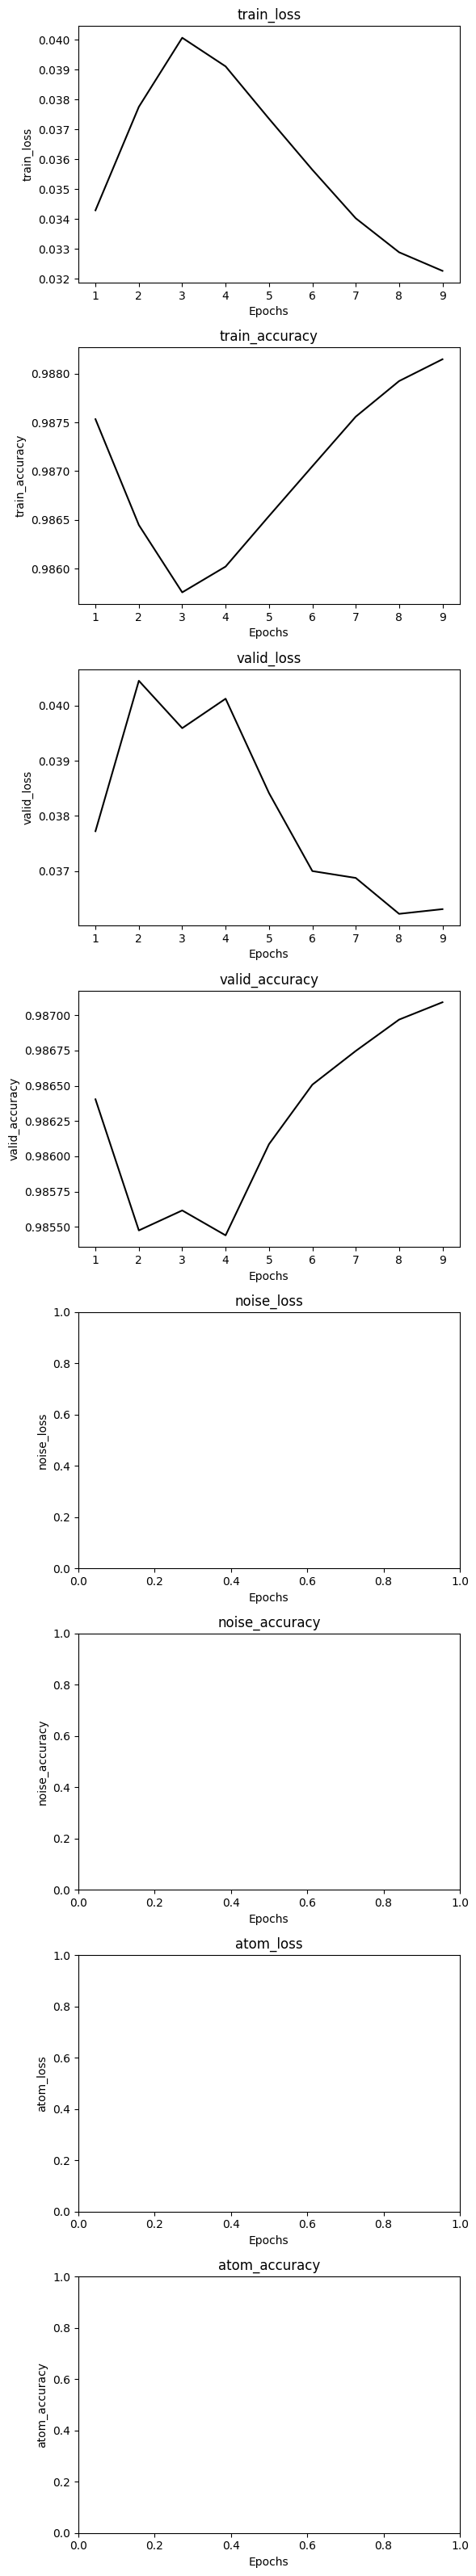

In [3]:
model.load_state_dict(torch.load('../../models/FPN/09282024-FPN-dataset_v5_size-10m/model_epoch_20.pth', weights_only=True, map_location=torch.device('cpu')))

training_specs['ds_size'] = 10000000
training_specs['epoch_start'] = 15
training_specs['folder_name'] = '09282024-FPN-dataset_v5_size-10m'

model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

In [ ]:
training_specs['ds_size'] = 10000000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 1K training dataset size 

In [ ]:
training_specs['ds_size'] = 1000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 5k dataset

In [ ]:
training_specs['ds_size'] = 5000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 10K dataset

In [ ]:
training_specs['ds_size'] = 10000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 100K dataset

In [ ]:
training_specs['ds_size'] = 100000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 500K dataset

In [ ]:
training_specs['ds_size'] = 500000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 1 million dataset

In [ ]:
training_specs['ds_size'] = 1000000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 2 million dataset

In [ ]:
training_specs['ds_size'] = 2000000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 5 million dataset

In [ ]:
training_specs['ds_size'] = 5000000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)